In [1]:
print('success')

In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv('C:/Users/PRADEEP/OneDrive/Desktop/ml  udemy/ML/Data Files/Data Files/churn_modeling.csv')

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
df.shape

(10000, 14)

In [7]:
df.count()

RowNumber          10000
CustomerId         10000
Surname            10000
CreditScore        10000
Geography          10000
Gender             10000
Age                10000
Tenure             10000
Balance            10000
NumOfProducts      10000
HasCrCard          10000
IsActiveMember     10000
EstimatedSalary    10000
Exited             10000
dtype: int64

In [8]:
df['CustomerId']

0       15634602
1       15647311
2       15619304
3       15701354
4       15737888
          ...   
9995    15606229
9996    15569892
9997    15584532
9998    15682355
9999    15628319
Name: CustomerId, Length: 10000, dtype: int64

In [9]:
import matplotlib.pyplot as plt

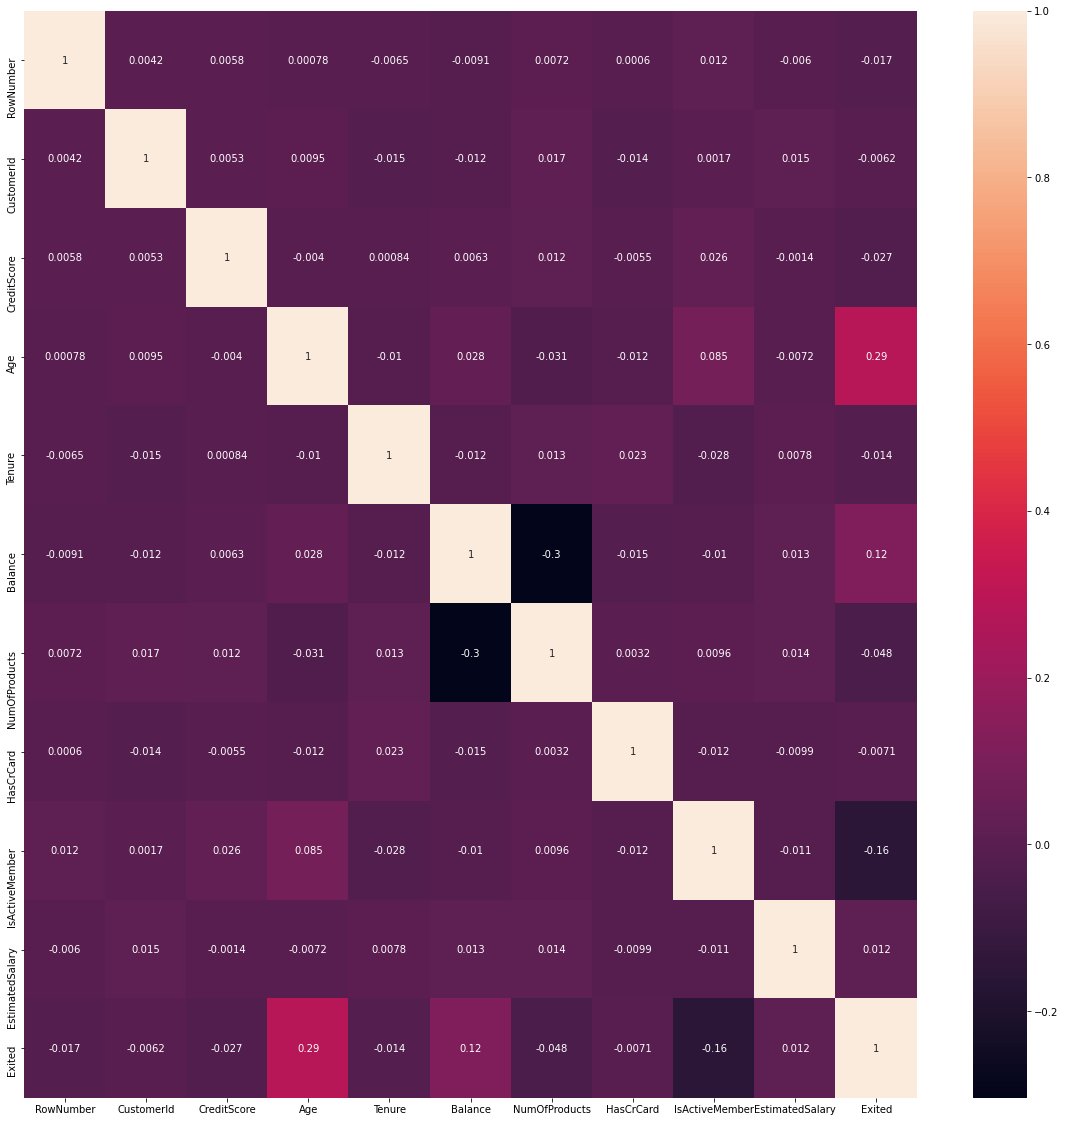

In [10]:
dfcorr = df.corr()
features_corr = dfcorr.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[features_corr].corr(),annot=True)

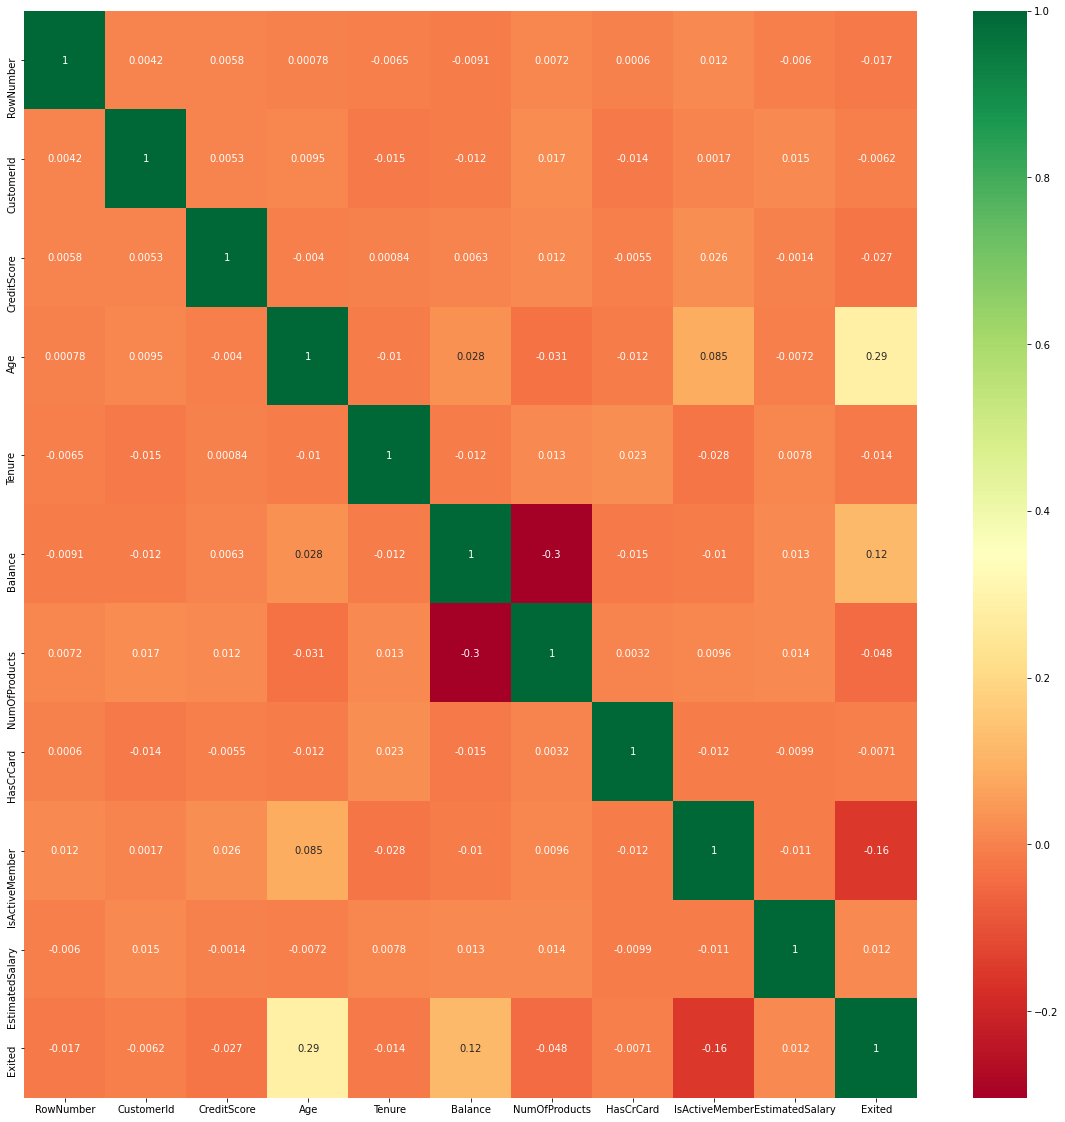

In [11]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [12]:
del(df['RowNumber'])
del(df['CustomerId'])
del(df['Surname'])

In [13]:
df = pd.get_dummies(df,columns=['Geography'],drop_first=True)
df = pd.get_dummies(df,columns=['Gender'],drop_first=True)

In [14]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [15]:
x = df.loc[:,df.columns!='Exited']

In [16]:
y = df['Exited']

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_Germany  10000 non-null  uint8  
 10  Geography_Spain    10000 non-null  uint8  
 11  Gender_Male        10000 non-null  uint8  
dtypes: float64(2), int64(7), uint8(3)
memory usage: 732.5 KB


In [18]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [21]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 11)
(2000, 11)
(8000,)
(2000,)


In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
sc = StandardScaler().fit(x_train)

In [24]:
x_train_sc = sc.transform(x_train)

In [25]:
x_test_sc = sc.transform(x_test)

In [26]:
from sklearn import svm

In [27]:
svm_clf = svm.SVC(kernel='linear',C=0.25) 

In [28]:
svm_clf.fit(x_train_sc,y_train)

SVC(C=0.25, kernel='linear')

In [29]:
pred_svm_clf = svm_clf.predict(x_test_sc)

In [30]:
from sklearn.metrics import accuracy_score

In [31]:
accuracy_score(y_test,pred_svm_clf)

0.7925

In [32]:
from sklearn.naive_bayes import GaussianNB

In [33]:

nvb_gaussian = GaussianNB()

In [34]:
nvb_gaussian.fit(x_train,y_train)

GaussianNB()

In [35]:
from sklearn.metrics import accuracy_score

In [36]:

accuracy_score(y_test,nvb_gaussian.predict(x_test))

0.785

In [37]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [38]:

lda = LinearDiscriminantAnalysis()

In [39]:
lda.fit(x_train,y_train)

LinearDiscriminantAnalysis()

In [40]:
pred = lda.predict(x_test)

In [41]:
accuracy_score(y_test,pred)

0.809

In [42]:
from sklearn import tree

In [43]:
tree = tree.DecisionTreeClassifier()

In [44]:
tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [45]:
pred_tree = lda.predict(x_test)

In [46]:
accuracy_score(y_test,pred_tree)

0.809

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
logistic_regression_model = LogisticRegression()

In [50]:

logistic_regression_model.fit(x_train,y_train)

LogisticRegression()

In [51]:
logistic_regression_pred = logistic_regression_model.predict(x_test)

In [52]:
accuracy_score(y_test,logistic_regression_pred)

0.7855